In [27]:
import os
import random
import pickle
import cv2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

In [25]:
data_path = '../data/CatsDogs/PetImages'
categories = ['Dog', 'Cat']

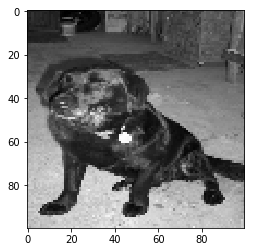

In [17]:
image_size = 100

new_array = cv2.resize(image_array, (image_size, image_size))

plt.imshow(new_array, cmap='gray')
plt.show()

In [19]:
training_data = []

# Go through all the images and assign a category label to each image
# 0 = Dog
# 1 = Cat
def create_training_data():
    for category in categories:
        path = os.path.join(data_path, category)

        class_num = categories.index(category)

        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(image_array, (image_size, image_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [20]:
print(len(training_data))

24946


In [24]:
random.shuffle(training_data)

for sample in training_data[0:10]:
    print(sample[1])

1
1
0
1
0
1
0
0
1
0


In [26]:
# General notation is big X for feature set, little y for labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

# The extra 1 because it's grayscale
X = np.array(X).reshape(-1, image_size, image_size, 1)

In [29]:
# Saving data as the arrays that we've created
pickle_out = open('cat_dogs_X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('cat_dogs_y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# To load in later: 
# pickle_in = open('X.pickle', 'rb')
# X = pickle.load(pickle_in)